# Notes / To Do
_________________________________________________________________________________________________________________________________________

- Current Challenges:
  - determining how to define categorical variables for certain demographic info (balance ammt, age range...)
  - figuring out how to count/calculate time spent per step
  - figuring out how to count/calculate bounce rate
  - figuring out how to interpret vist_id vs. visitor_id
  - figuring out whether every new session opens on 'start' regardless of how far the client has pushed through the process in a previous login

- Null values
  - (DONE) 14 null rows for client_prof frame (maybe to ignore depending on how we use that demographic data)
  - (DONE) Many null values for variation in df_with_variation frame - all dropped

- organize list of functions

- Summary table at client id label: 
  - (DONE) highest step reached
  - avg step duration
  - (DONE) hit error(Y/N)
  - (DONE) number of errors
  - total number of visits
  - bounced (Y/N)
  - total number of bounces
  - (DONE) age
  - age range
  - (DONE) balance
  - balance category
  - (DONE) longevity in years
  - longevity category
  - (DONE) num calls
  - (DONE) gender
  - (DONE) num accounts

- (DONE) Git Repo for version control
- (DONE) clean date/time formatting
- (DONE) merge pt1 pt2
- (DONE) check the null value
- (DONE) separate test group and control group
- (Kranta) categorization of clients by age range into categorical variables
- (Kranta) categorization of clients by longevity into categorical variables
- (Kranta) categorization of total balence into categorical variables

- KPIs / Metrics
  - (DONE)Stop Step Rate
  - (DONE) Process completion rate 
  - (Darcee) Process completion rate multiple regression against various combos of variables
  - (Martino) Time per process step
  - (Darcee] Error Rates (reverting back to previous step, 
  - (Xiaobo) Bounce Rate (beginning and ending a session on the same step - not progressing to next step during a session)
  - Association of number of calls to being part of the study or not, and if part of study in the test or control
  - Association between completion rate and number of calls
  - Association between completion rate and number of logins
  - Association between number of accounts and number of logins
  - Association between number of accounts & something...
  - Does number of accounts predict higher total balance
  - Association of test/control group and total balance
  - Trend in balance against customer longevity
  
- Visualizations
  - something for each KPI
  - something for demographics - (DONE) sort by date (2017.3.15 - 2017.6.20)
  - process step proportion -- > group stacked bar chart (maybe?)





# Key Figures:
__________________________________________________________________________________________________________________________________

- Total clients in client_prof frame:70609
- Total clients in client_prof frame with null values for client information: 14
- Total clients in client_prof frame with no null values:70595
- Total clients in the experiment_roster frame: 70609
- Total records in pt1 frame = 343141
- Total records in pt2 frame = 412264
- Total records in digital_footprints frame (includes study non-participants)= 744641
- Total records in test_group frame: 176699
- Total records in control_group frame: 427406

- Highest Process step reached by TEST group in by percentage of users:

        - start      31.56 %
        - step_1     21.88 %
        - step_2     17.49 %
        - step_3     14.58 %
        - confirm    14.49 %

- Highest Process step reached by CONTROL group in by percentage of users:

        - start      32.29 %
        - step_1     21.02 %
        - step_2     18.34 %
        - step_3     16.01 %
        - confirm    12.34 %


# Unify the names of df
________________________________________________________________________________________________________________________________

for now, we have:
- client_prof --> (df_final_demo.txt)
- experiment_roster -->(df_final_experiment_clients.txt)
- pt1 -->(df_final_web_data_pt1.txt)
- pt2 -->(df_final_web_data_pt.txt)

- digital_footprints --> pt1 + pt2
- df_with_variation --> digital_footprints with column "Variation"
- test_group
- control_group


# Loading the Data & Creating Data Frames
_________________________________________________________________________________________________________________________________

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os #for csv export
import scipy.stats as st# p-value, # cramer's V, hypothesis testing
# import statsmodels.api as sm # qqplot

In [2]:
# create dataframes for each file importing from google sheet link so we don't have to have it local
df_final_demo ='https://docs.google.com/spreadsheets/d/1V3TNfdz2_xWZBIGJ2HrTATiK5o2NBe0meWmGsY5W5fs/export?gid=1888831564&format=csv'
client_prof=pd.read_csv(df_final_demo)
# create dataframe of experiment roster
df_final_experiment_clients = 'https://docs.google.com/spreadsheets/d/1V3TNfdz2_xWZBIGJ2HrTATiK5o2NBe0meWmGsY5W5fs/export?gid=28812129&format=csv'
experiment_roster=pd.read_csv(df_final_experiment_clients)
df_final_web_data_pt_1 ='https://docs.google.com/spreadsheets/d/1V3TNfdz2_xWZBIGJ2HrTATiK5o2NBe0meWmGsY5W5fs/export?gid=1512444594&format=csv'
pt1=pd.read_csv(df_final_web_data_pt_1)
df_final_web_data_pt_2 = 'https://docs.google.com/spreadsheets/d/1V3TNfdz2_xWZBIGJ2HrTATiK5o2NBe0meWmGsY5W5fs/export?gid=1594148686&format=csv'
pt2=pd.read_csv(df_final_web_data_pt_2)

# Exploring & Viewing the Data
___________________________________________________________________________________________________________________________________

In [3]:
# View client profiles  data frame and check the number of null values

display(client_prof)
print(client_prof.isna().sum())

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


client_id            0
clnt_tenure_yr      14
clnt_tenure_mnth    14
clnt_age            15
gendr               14
num_accts           14
bal                 14
calls_6_mnth        14
logons_6_mnth       14
dtype: int64


In [4]:
# extract the clients with null values
client_prof_null = client_prof[client_prof['clnt_age'].isnull()]
display(client_prof_null)

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
4164,7402828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8316,355337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8677,8412164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9583,4666211,8.0,106.0,NaN,F,2.0,42550.55,4.0,7.0
13444,2222915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18066,4876926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25961,5277910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28432,7616759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35323,8191345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43518,1227228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# View dataframe of experiment roster

display(experiment_roster)
print(experiment_roster['Variation'].value_counts(dropna=False))

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


Variation
Test       26968
Control    23532
NaN        20109
Name: count, dtype: int64


In [6]:
# check if clients with null value in the experiment roster
if_participated = experiment_roster.merge(client_prof_null, on='client_id', how='inner')

# If there are any rows in if_participated, it means these clients participated in the experiment
if not if_participated.empty:
    print("Clients with null values are in the experiment roster.")
    display(if_participated)
else:
    print("Clients with null values are not in the experiment roster.")


Clients with null values are in the experiment roster.


,client_id,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,8191345,Control,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5144725,Test,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7616759,Control,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2222915,Test,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5277910,Test,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,8412164,Test,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,8611797,Control,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,355337,Control,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,4666211,Control,8.0,106.0,NaN,F,2.0,42550.55,4.0,7.0
9,1227228,Test,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# View dataframe of pt1 
display(pt1)

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
343136,2443347,465784886_73090545671,136329900_10529659391_316129,confirm,2017-03-31 15:15:46
343137,2443347,465784886_73090545671,136329900_10529659391_316129,step_3,2017-03-31 15:14:53
343138,2443347,465784886_73090545671,136329900_10529659391_316129,step_2,2017-03-31 15:12:08
343139,2443347,465784886_73090545671,136329900_10529659391_316129,step_1,2017-03-31 15:11:37


In [8]:
# View dataframe of pt2

display(pt2)

,client_id,visitor_id,visit_id,process_step,date_time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48
3,6019349,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08
4,6019349,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


# Merging Data Frames | Generating test & control groups
_________________________________________________________________________________________________________________________

In [9]:
# combine pt1 and pt2; drop duplicate
digital_footprints = pd.concat([pt1,pt2])
digital_footprints = digital_footprints[~digital_footprints.duplicated()]
digital_footprints

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [10]:
#total number of study participants who reached each step 
#includes duplicates - some clients have multiple records where they reached the same step (ie. two records where they finish at step 1)
print('total_process_steps_count:')
display(digital_footprints['process_step'].value_counts())

total_process_steps_count:


process_step
start      234999
step_1     162797
step_2     132750
step_3     111589
confirm    102506
Name: count, dtype: int64

In [11]:
# add the column "Variation", sorted by date_time
df_with_variation = digital_footprints.merge(experiment_roster, on='client_id', how='left').sort_values(by="date_time")
df_with_variation

,client_id,visitor_id,visit_id,process_step,date_time,Variation
284865,9088444,242404224_96732670250,423038079_46067236368_400417,step_3,2017-03-15 00:03:03,NaN
35092,7179755,167765295_97487764427,264484508_5982901710_928530,start,2017-03-15 00:19:28,Control
35091,7179755,167765295_97487764427,264484508_5982901710_928530,step_1,2017-03-15 00:20:50,Control
35090,7179755,167765295_97487764427,264484508_5982901710_928530,step_2,2017-03-15 00:22:52,Control
35089,7179755,167765295_97487764427,264484508_5982901710_928530,step_3,2017-03-15 00:23:47,Control
...,...,...,...,...,...,...
513720,4159912,169591677_18042085072,358114812_31313949217_790854,start,2017-06-20 23:58:40,NaN
513719,4159912,169591677_18042085072,358114812_31313949217_790854,step_1,2017-06-20 23:59:00,NaN
513718,4159912,169591677_18042085072,358114812_31313949217_790854,step_2,2017-06-20 23:59:23,NaN
521364,5640210,854970757_75895258102,959123368_90077952691_695747,start,2017-06-20 23:59:53,NaN


In [12]:
null_variation_count = df_with_variation['Variation'].isnull().sum()
print("Number of rows with null values in the 'variation' column:", null_variation_count)

# extract the rows with null value in 'Variation'
null_variation = df_with_variation[df_with_variation['Variation'].isnull()]
display(null_variation)

Number of rows with null values in the 'variation' column: 427406


,client_id,visitor_id,visit_id,process_step,date_time,Variation
284865,9088444,242404224_96732670250,423038079_46067236368_400417,step_3,2017-03-15 00:03:03,NaN
309196,1151364,278470627_1124116581,514307291_95706222191_158038,start,2017-03-15 07:35:10,NaN
309195,1151364,278470627_1124116581,514307291_95706222191_158038,step_1,2017-03-15 07:35:23,NaN
309194,1151364,278470627_1124116581,514307291_95706222191_158038,step_2,2017-03-15 07:35:30,NaN
309193,1151364,278470627_1124116581,514307291_95706222191_158038,start,2017-03-15 07:37:57,NaN
...,...,...,...,...,...,...
513720,4159912,169591677_18042085072,358114812_31313949217_790854,start,2017-06-20 23:58:40,NaN
513719,4159912,169591677_18042085072,358114812_31313949217_790854,step_1,2017-06-20 23:59:00,NaN
513718,4159912,169591677_18042085072,358114812_31313949217_790854,step_2,2017-06-20 23:59:23,NaN
521364,5640210,854970757_75895258102,959123368_90077952691_695747,start,2017-06-20 23:59:53,NaN


In [13]:
# Extract rows with 'Test' variation
test_group = df_with_variation[df_with_variation['Variation'] == 'Test']
print('Test Group')
display(test_group)
# Number of each step
print('process steps count - test group:')
print(test_group['process_step'].value_counts())
print('customer number of test group:',test_group['client_id'].nunique())

print('\n')
# Extract rows with 'Control' variation
control_group = df_with_variation[df_with_variation['Variation'] == 'Control']
print('Control Group')
display(control_group)
# Number of each step
print('process steps count - control group:')
print(control_group['process_step'].value_counts())
print('customer number of control group:',control_group['client_id'].nunique())

Test Group


,client_id,visitor_id,visit_id,process_step,date_time,Variation
79084,4192640,692067844_75217592829,706721307_85347845958_18583,start,2017-03-15 00:43:23,Test
79083,4192640,692067844_75217592829,706721307_85347845958_18583,step_1,2017-03-15 00:43:32,Test
79082,4192640,692067844_75217592829,706721307_85347845958_18583,step_2,2017-03-15 00:43:48,Test
79081,4192640,692067844_75217592829,706721307_85347845958_18583,step_1,2017-03-15 00:44:36,Test
79080,4192640,692067844_75217592829,706721307_85347845958_18583,start,2017-03-15 00:44:38,Test
...,...,...,...,...,...,...
353583,1545935,976873968_42239039722,10056419_61656665964_803695,start,2017-06-20 23:17:42,Test
353582,1545935,976873968_42239039722,10056419_61656665964_803695,step_1,2017-06-20 23:17:45,Test
353581,1545935,976873968_42239039722,10056419_61656665964_803695,step_2,2017-06-20 23:17:58,Test
353580,1545935,976873968_42239039722,10056419_61656665964_803695,step_3,2017-06-20 23:20:34,Test


process steps count - test group:
process_step
start      55773
step_1     38666
step_2     30899
step_3     25761
confirm    25600
Name: count, dtype: int64
customer number of test group: 26968


Control Group


,client_id,visitor_id,visit_id,process_step,date_time,Variation
35092,7179755,167765295_97487764427,264484508_5982901710_928530,start,2017-03-15 00:19:28,Control
35091,7179755,167765295_97487764427,264484508_5982901710_928530,step_1,2017-03-15 00:20:50,Control
35090,7179755,167765295_97487764427,264484508_5982901710_928530,step_2,2017-03-15 00:22:52,Control
35089,7179755,167765295_97487764427,264484508_5982901710_928530,step_3,2017-03-15 00:23:47,Control
35088,7179755,167765295_97487764427,264484508_5982901710_928530,confirm,2017-03-15 00:26:24,Control
...,...,...,...,...,...,...
517375,291330,992344309_24884468623,91879336_25502670457_529422,step_1,2017-06-20 23:21:41,Control
620354,1558312,397562195_28573798537,175513303_32086468382_224926,confirm,2017-06-20 23:26:00,Control
515868,6187864,113539532_90731779729,77393632_6804608909_354572,start,2017-06-20 23:56:17,Control
515867,6187864,113539532_90731779729,77393632_6804608909_354572,step_1,2017-06-20 23:56:30,Control


process steps count - control group:
process_step
start      45380
step_1     29544
step_2     25773
step_3     22503
confirm    17336
Name: count, dtype: int64
customer number of control group: 23532


# Cleaning Date & Time Formatting
_____________________________________________________________________________________________________________________________________

In [14]:
# # Spliting "time" into date and time stamp for test group

# test_group['date_ymd'] = test_group['date_time'].apply(lambda x: pd.to_datetime(x).date())
# test_group['date_time'] = pd.to_datetime(test_group['date_time'])
# test_group['time_only'] = test_group['date_time'].dt.time
# print(test_group)

In [15]:
#display(test_group)

In [16]:
# # Spliting "time" into date and time stamp for control group

# control_group['date_ymd'] = control_group['date_time'].apply(lambda x: pd.to_datetime(x).date())
# control_group['date_time'] = pd.to_datetime(control_group['date_time'])
# control_group['time_only'] = control_group['date_time'].dt.time
# display(control_group)

In [17]:
#display(test_group)

In [18]:
#For TEST group
# Create a new column with the time of day
# Assuming result_df_1['date_time'] contains datetime objects
# Define time ranges for each period of the day

#time_ranges = [
    #(0, 6),     # Night: 12:00 AM - 5:59 AM
    #(6, 12),    # Morning: 6:00 AM - 11:59 AM
    #(12, 18),   # Afternoon: 12:00 PM - 5:59 PM
    #(18, 24)    # Evening: 6:00 PM - 11:59 PM]

# Define corresponding labels for each period of the day
#time_labels = ['Night', 'Morning', 'Afternoon', 'Evening']
# Categorize each datetime object into a time period
#test_group['time_period'] = pd.cut(test_group['date_time'].dt.hour, bins=[0, 6, 12, 18, 24], labels=time_labels, right=False)
#display(test_group)

In [19]:
#For CONTROL group
# Create a new column with the time of day
# Assuming result_df_1['date_time'] contains datetime objects
# Define time ranges for each period of the day

#time_ranges = [
    #(0, 6),     # Night: 12:00 AM - 5:59 AM
    #(6, 12),    # Morning: 6:00 AM - 11:59 AM
    #(12, 18),   # Afternoon: 12:00 PM - 5:59 PM
    #(18, 24)    # Evening: 6:00 PM - 11:59 PM]

# Define corresponding labels for each period of the day
#time_labels = ['Night', 'Morning', 'Afternoon', 'Evening']
# Categorize each datetime object into a time period
#control_group['time_period'] = pd.cut(control_group['date_time'].dt.hour, bins=[0, 6, 12, 18, 24], labels=time_labels, right=False)
#display(control_group)

In [20]:
# # export control_group frame to CSV

# # Get the current working directory
# current_directory = os.getcwd()

# # Specify the file name
# file_name = "control_group.csv"

# # Join the current directory with the file name to create the file path
# file_path = os.path.join(current_directory, file_name)

# # Export the summary_table DataFrame to a CSV file
# control_group.to_csv(file_path, index=False)

# print(f"Control group table has been exported to {file_path}")

In [21]:
# # export test_group frame to CSV

# # Get the current working directory
# current_directory = os.getcwd()

# # Specify the file name
# file_name = "test_group.csv"

# # Join the current directory with the file name to create the file path
# file_path = os.path.join(current_directory, file_name)

# # Export the summary_table DataFrame to a CSV file
# test_group.to_csv(file_path, index=False)

# print(f"Test group table has been exported to {file_path}")

In [22]:
#Loading Test & Control data frames

test_group = pd.read_csv("test_group.csv")
control_group = pd.read_csv("control_group.csv")



In [23]:
print("Total Unique cLients in Test dataframe: ", test_group['client_id'].nunique())
print("Total Unique cLients in Control dataframe: ", control_group['client_id'].nunique())
print("Total Unique cLients in Test and Control dataframes: ", test_group['client_id'].nunique() + control_group['client_id'].nunique())


Total Unique cLients in Test dataframe:  26968
Total Unique cLients in Control dataframe:  23532
Total Unique cLients in Test and Control dataframes:  50500


# Analysis | KPIs | Metrics
_____________________________________________________________________________________________________________________________________

### Process Completion Analysis
___________________________________________________________

In [24]:
###Highest step reached for TEST group - identifying higheest step and appending this as a column

# Define the hierarchy of process steps
step_hierarchy = {
    'start': 1,
    'step_1': 2,
    'step_2': 3,
    'step_3': 4,
    'confirm': 5
}

# Map the step hierarchy to the 'process_step' column
test_group.loc[:, 'step_hierarchy'] = test_group['process_step'].map(step_hierarchy)

# Find the highest step reached for each individual client
highest_step_reached_test = test_group.groupby('client_id')['step_hierarchy'].max()

# Map the hierarchy back to step names
highest_step_reached_test = highest_step_reached_test.map({v: k for k, v in step_hierarchy.items()})

print('Highest step reached for each individual client:')
display(highest_step_reached_test)



Highest step reached for each individual client:


client_id
555        confirm
647        confirm
934          start
1336       confirm
1346        step_3
            ...   
9999150     step_1
9999400    confirm
9999626     step_1
9999729    confirm
9999832     step_1
Name: step_hierarchy, Length: 26968, dtype: object

In [25]:
###Highest step reached for CONTROL group- identifying higheest step and appending this as a column

# Map the step hierarchy to the 'process_step' column
control_group.loc[:, 'step_hierarchy'] = control_group['process_step'].map(step_hierarchy)

# Find the highest step reached for each individual client
highest_step_reached_control = control_group.groupby('client_id')['step_hierarchy'].max()

# Map the hierarchy back to step names
highest_step_reached_control = highest_step_reached_control.map({v: k for k, v in step_hierarchy.items()})

print('Highest step reached for each individual client:')
print(highest_step_reached_control)

Highest step reached for each individual client:
client_id
1028        step_3
1104         start
1186        step_2
1195       confirm
1197       confirm
            ...   
9997125    confirm
9997391     step_3
9997470    confirm
9998346    confirm
9998921      start
Name: step_hierarchy, Length: 23532, dtype: object


In [26]:
### Total clients reaching each step in the test and control groups

# Map process steps to their corresponding hierarchy values
test_group['step_hierarchy'] = test_group['process_step'].map(step_hierarchy)
control_group['step_hierarchy'] = control_group['process_step'].map(step_hierarchy)

# Group by client_id and find the maximum hierarchy value for each group
highest_step_test_group = test_group.groupby('client_id')['step_hierarchy'].max()
highest_step_control_group = control_group.groupby('client_id')['step_hierarchy'].max()

# Count occurrences of each highest step reached
print("Highest Step Reached Per Individual Client in TEST GROUP: ")
display(highest_step_test_group.value_counts())

print("Highest Step Reached Per Individual Client in CONTROL GROUP: ")
display(highest_step_control_group.value_counts())

Highest Step Reached Per Individual Client in TEST GROUP: 


step_hierarchy
5    18687
1     2454
4     2436
2     1980
3     1411
Name: count, dtype: int64

Highest Step Reached Per Individual Client in CONTROL GROUP: 


step_hierarchy
5    15434
1     3285
4     2093
2     1455
3     1265
Name: count, dtype: int64

In [27]:
#Calculating the percentage of clients reaching each step for test and control groups

#Highest step reached per client - test group
test_group_max_steps = test_group.groupby('client_id')['step_hierarchy'].max()
# Calculate total number of clients in the test group
total_clients_test_group = len(test_group_max_steps)
# Calculate percentages for the test group
test_group_step_counts = test_group_max_steps.value_counts()
test_group_percentages = round((test_group_step_counts / total_clients_test_group) * 100,2)

# Repeat the same process for the control group
control_group_max_steps = control_group.groupby('client_id')['step_hierarchy'].max()
total_clients_control_group = len(control_group_max_steps)
control_group_step_counts = control_group_max_steps.value_counts()
control_group_percentages = round((control_group_step_counts / total_clients_control_group) * 100,2)


print("\nPercentages in TEST GROUP:")
print("start:", test_group_percentages.get(1, 0),"%")
print("step_1:", test_group_percentages.get(2, 0),"%")
print("step_2:", test_group_percentages.get(3, 0),"%")
print("step_3:", test_group_percentages.get(4, 0),"%")
print("confirm:", test_group_percentages.get(5, 0),"%")


print("\nPercentages in CONTROL GROUP:")
print("start:", control_group_percentages.get(1, 0),"%")
print("step_1:", control_group_percentages.get(2, 0),"%")
print("step_2:", control_group_percentages.get(3, 0),"%")
print("step_3:", control_group_percentages.get(4, 0),"%")
print("confirm:", control_group_percentages.get(5, 0),"%")


Percentages in TEST GROUP:
start: 9.1 %
step_1: 7.34 %
step_2: 5.23 %
step_3: 9.03 %
confirm: 69.29 %

Percentages in CONTROL GROUP:
start: 13.96 %
step_1: 6.18 %
step_2: 5.38 %
step_3: 8.89 %
confirm: 65.59 %


In [28]:
# Convert highest_step_control_group to DataFrame
highest_step_control_group_df = highest_step_control_group.to_frame()

# Rename the column to step_hierarchy_control_group
highest_step_control_group_df.columns = ['step_hierarchy_control_group']

# Display the DataFrame
print(highest_step_control_group_df)

           step_hierarchy_control_group
client_id                              
1028                                  4
1104                                  1
1186                                  3
1195                                  5
1197                                  5
...                                 ...
9997125                               5
9997391                               4
9997470                               5
9998346                               5
9998921                               1

[23532 rows x 1 columns]


In [29]:
# Convert highest_step_control_group to DataFrame
highest_step_test_group_df = highest_step_test_group.to_frame()

# Rename the column to step_hierarchy_control_group
highest_step_test_group_df.columns = ['step_hierarchy_control_group']

# Display the DataFrame
print(highest_step_test_group_df)

           step_hierarchy_control_group
client_id                              
555                                   5
647                                   5
934                                   1
1336                                  5
1346                                  4
...                                 ...
9999150                               2
9999400                               5
9999626                               2
9999729                               5
9999832                               2

[26968 rows x 1 columns]


In [30]:
# Calculate completion rate for the test group
test_group_confirm_counts = (test_group.groupby('client_id')['step_hierarchy'].max()==5).value_counts()
test_group_completion_rate = round((test_group_confirm_counts / total_clients_test_group) * 100,2)
# Print percentages for the test group
print("\nCompletion rate in TEST GROUP:", test_group_completion_rate[True],'%')
# Calculate completion rate for the control group
control_group_confirm_counts = (control_group.groupby('client_id')['step_hierarchy'].max()==5).value_counts()
control_group_completion_rate = round((control_group_confirm_counts / total_clients_control_group) * 100,2)
# Print percentages for the control group
print("\nCompletion rate in CONTROL GROUP:", control_group_completion_rate[True],'%')


Completion rate in TEST GROUP: 69.29 %

Completion rate in CONTROL GROUP: 65.59 %


In [31]:
completion_rate_new = test_group_completion_rate[True]
completion_rate_old = control_group_completion_rate[True]
increase_in_completion_rate =  completion_rate_new - completion_rate_old
# Check if the increase meets or exceeds the 5% threshold
threshold = 5.0  # Threshold set by Vanguard
if increase_in_completion_rate >= threshold:
    print("The observed increase in completion rate meets or exceeds the 5% threshold.")
else:
    print("The observed increase in completion rate does not meet the 5% threshold.")
    
# The observed increase in completion rate does not meet the 5% threshold. 
# This means that the improvement brought by the new design is below the minimum desired level of 5%, 
# as set by Vanguard. Therefore, based on completion rate alone, the new design may not be considered 
# cost-effective from Vanguard's perspective.

The observed increase in completion rate does not meet the 5% threshold.


### Time Spent per Step
______________________________________________________________________________________________________________________________________

In [32]:
# Control Group
# Sort the DF
cg_sorted = control_group.sort_values(by=['client_id', 'date_time'])

# Create a lagged column with the previous step
# When the shift function is applied after the groupby('client_id'), it shifts the values within each group separately. 
# This means that when the 'client_id' changes, the shifting operation will restart and apply to the next group of rows 
# belonging to the new 'client_id'.
cg_sorted['next_step'] = cg_sorted.groupby('client_id')['process_step'].shift(-1)
cg_sorted['next_step_datetime'] = cg_sorted.groupby('client_id')['date_time'].shift(-1)


In [33]:
## Create a new column that captures the time spent on the current step

# Convert the 'date_time' and 'next_step_datetime' columns to datetime format
cg_sorted['date_time'] = pd.to_datetime(cg_sorted['date_time'])
cg_sorted['next_step_datetime'] = pd.to_datetime(cg_sorted['next_step_datetime'])

# Create a new column that captures the time spent on the current step
# Calculate the difference between 'next_step_datetime' and 'date_time' columns
cg_sorted['time_spent_on_step'] = (cg_sorted['next_step_datetime'] - cg_sorted['date_time']).dt.total_seconds()

# Fill NaN values with NaT ('NaT', which represents missing or undefined datetime values in pandas)
# for rows where there's no previous step
cg_sorted['time_spent_on_step'] = cg_sorted['time_spent_on_step'].fillna(pd.NaT)

In [34]:
# Initialize variables to store login number and start time
login_number = {}
start_time = {}

# Iterate over each row in the DataFrame
for index, row in cg_sorted.iterrows():
    client_id = row['client_id']
    process_step = row['process_step']
    date_time = row['date_time']
    
    # If the step is 'start', assign a new login number and update start time
    if process_step == 'start':
        # Check if the client already has a login number
        if client_id in login_number:
            # If the difference between current time and last start time is less than or equal to 1 hour,
            # assign the same login number, otherwise, increment the login number
            if (date_time - start_time[client_id]).total_seconds() > 3600:
                login_number[client_id] += 1
            start_time[client_id] = date_time
        else:
            login_number[client_id] = 1
            start_time[client_id] = date_time
    
    
    # Assign the login number based on the client_id and process_step
    cg_sorted.at[index, 'login_number'] = login_number.get(client_id, 0)  

# Calculate the time difference (time spent on each step)
cg_sorted['time_spent_on_step'] = cg_sorted.groupby(['client_id', 'login_number'])['date_time'].diff(-1).dt.total_seconds().abs()

In [35]:
# Calculate the time difference in seconds
time_diff_seconds = (cg_sorted['next_step_datetime'] - cg_sorted['date_time']).dt.total_seconds()

# Create a new column 'login_number_updated' based on the time difference condition
cg_sorted['login_number_updated'] = cg_sorted['login_number']

# Find rows where the process_step is 'confirm' and the time difference is greater than 3600 seconds
mask = (cg_sorted['process_step'] == 'confirm') & (time_diff_seconds > 3600)

# Update the 'login_number_updated' column for the subsequent confirm steps
cg_sorted.loc[mask, 'login_number_updated'] = 999

In [36]:
# Find rows with process_step == 'confirm' that are preceded by 'login_number_updated' == 999
mask2 = (cg_sorted['process_step'] == 'confirm') & (cg_sorted['login_number_updated'].shift(1) == 999)

# Update the 'login_number_updated' column for these rows to 999
cg_sorted.loc[mask2, 'login_number_updated'] = 999

In [37]:
## Now we can drop the rows with login_number_updated = 999

cg_sorted = cg_sorted.drop(cg_sorted[cg_sorted['login_number_updated'] == 999].index)

## Lastly we drop the rows with 0 time spent on the step

cg_sorted = cg_sorted.drop(cg_sorted[(cg_sorted['time_spent_on_step'] == 0) | cg_sorted['time_spent_on_step'].isna()].index)

In [38]:
##Now we create the new df that groups the logins: 

# Group the data by client ID, login number, and process step, and sum the time spent on each step
grouped_df_cg = cg_sorted.groupby(['client_id', 'login_number', 'login_number_updated', 'process_step'])['time_spent_on_step'].sum().reset_index()

##Add a column with time in minutes

grouped_df_cg['time_spent_on_step(min)'] = round(grouped_df_cg['time_spent_on_step']/60,3)
grouped_df_cg['time_spent_on_step(min)'] = grouped_df_cg['time_spent_on_step(min)'].astype(float)
display(grouped_df_cg)

,client_id,login_number,login_number_updated,process_step,time_spent_on_step,time_spent_on_step(min)
0,1028,1.0,1.0,start,49.0,0.817
1,1028,1.0,1.0,step_1,94.0,1.567
2,1028,1.0,1.0,step_2,284.0,4.733
3,1028,1.0,1.0,step_3,111.0,1.850
4,1186,2.0,2.0,start,11.0,0.183
...,...,...,...,...,...,...
83714,9997470,3.0,3.0,step_3,2073.0,34.550
83715,9998346,1.0,1.0,start,62.0,1.033
83716,9998346,1.0,1.0,step_1,61.0,1.017
83717,9998346,1.0,1.0,step_2,87.0,1.450


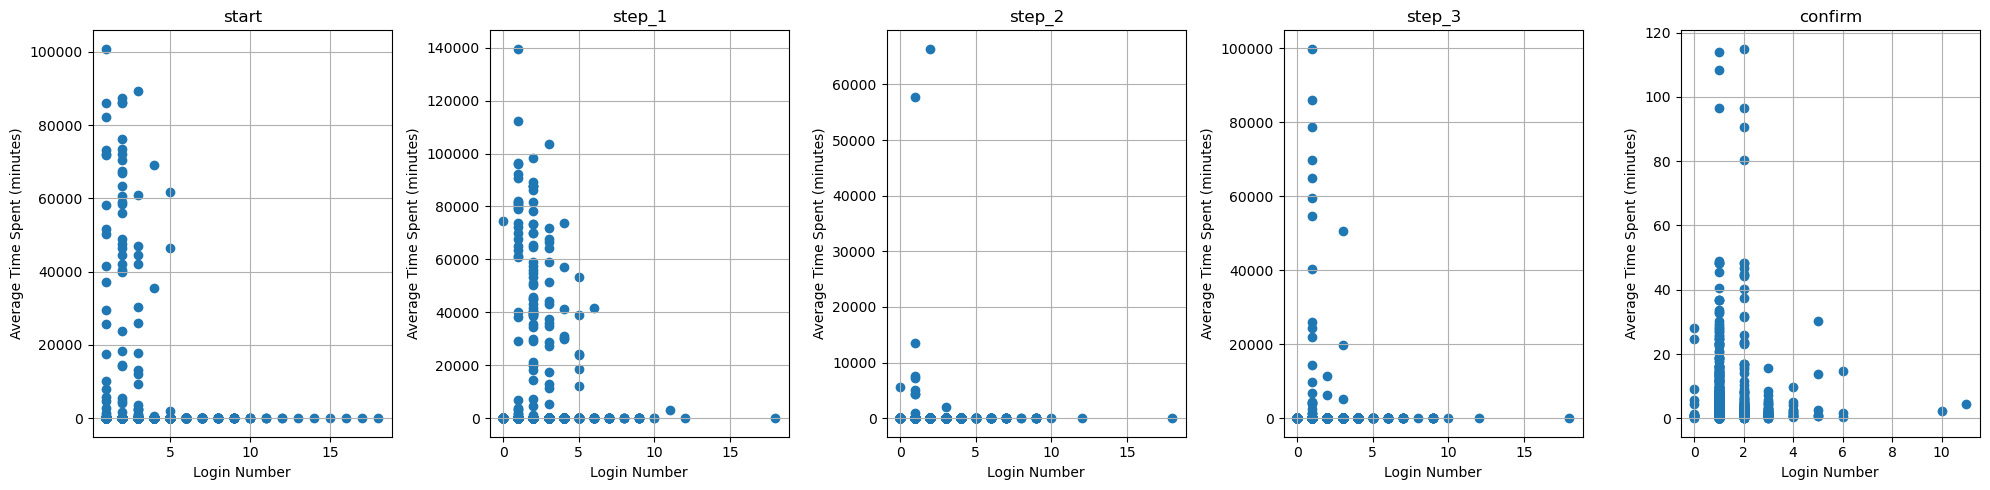

In [39]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'grouped_df' with columns: 'login_number', 'process_step', and 'time_spent_on_step'

# Step 1: Calculate the average time spent on each step per client login
avg_time_per_step = grouped_df_cg.groupby(['client_id', 'login_number_updated', 'process_step'])['time_spent_on_step(min)'].mean().reset_index()

# Step 2: Create a separate scatter plot for each step
steps = ['start', 'step_1', 'step_2', 'step_3', 'confirm']

# Create subplots for each step
fig, axes = plt.subplots(nrows=1, ncols=len(steps), figsize=(20, 5))

for i, step in enumerate(steps):
    step_data = avg_time_per_step[avg_time_per_step['process_step'] == step]
    ax = axes[i]
    ax.scatter(step_data['login_number_updated'], step_data['time_spent_on_step(min)'])
    ax.set_title(step)
    ax.set_xlabel('Login Number')
    ax.set_ylabel('Average Time Spent (minutes)')
    ax.grid(True)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

In [40]:
# Group the DataFrame by 'process_step' and calculate the total time spent on each step
total_time_per_step = grouped_df_cg.groupby('process_step')['time_spent_on_step(min)'].sum()

# Calculate the number of occurrences of each step
num_occurrences_per_step = grouped_df_cg.groupby('process_step').size()

# Calculate the average time spent on each step
average_time_per_step = total_time_per_step / num_occurrences_per_step

# Display the result
display(average_time_per_step)

process_step
confirm      4.179172
start      112.281510
step_1     257.681266
step_2      11.207698
step_3      49.201258
dtype: float64

In [41]:
#TEST

# Sort the DF
test_sorted = test_group.sort_values(by=['client_id', 'date_time'])

# Create a lagged column with the previous step
# When the shift function is applied after the groupby('client_id'), it shifts the values within each group separately. 
# This means that when the 'client_id' changes, the shifting operation will restart and apply to the next group of rows 
# belonging to the new 'client_id'.
test_sorted['next_step'] = test_sorted.groupby('client_id')['process_step'].shift(-1)
test_sorted['next_step_datetime'] = test_sorted.groupby('client_id')['date_time'].shift(-1)


In [42]:
## Create a new column that captures the time spent on the current step

# Convert the 'date_time' and 'next_step_datetime' columns to datetime format
test_sorted['date_time'] = pd.to_datetime(test_sorted['date_time'])
test_sorted['next_step_datetime'] = pd.to_datetime(test_sorted['next_step_datetime'])

# Create a new column that captures the time spent on the current step
# Calculate the difference between 'next_step_datetime' and 'date_time' columns
test_sorted['time_spent_on_step'] = (test_sorted['next_step_datetime'] - test_sorted['date_time']).dt.total_seconds()

# Fill NaN values with NaT ('NaT', which represents missing or undefined datetime values in pandas)
# for rows where there's no previous step
test_sorted['time_spent_on_step'] = test_sorted['time_spent_on_step'].fillna(pd.NaT)

In [43]:
# Initialize variables to store login number and start time
login_number = {}
start_time = {}

# Iterate over each row in the DataFrame
for index, row in test_sorted.iterrows():
    client_id = row['client_id']
    process_step = row['process_step']
    date_time = row['date_time']
    
    # If the step is 'start', assign a new login number and update start time
    if process_step == 'start':
        # Check if the client already has a login number
        if client_id in login_number:
            # If the difference between current time and last start time is less than or equal to 1 hour,
            # assign the same login number, otherwise, increment the login number
            if (date_time - start_time[client_id]).total_seconds() > 3600:
                login_number[client_id] += 1
            start_time[client_id] = date_time
        else:
            login_number[client_id] = 1
            start_time[client_id] = date_time
    
    
    # Assign the login number based on the client_id and process_step
    test_sorted.at[index, 'login_number'] = login_number.get(client_id, 0)  

# Calculate the time difference (time spent on each step)
test_sorted['time_spent_on_step'] = test_sorted.groupby(['client_id', 'login_number'])['date_time'].diff(-1).dt.total_seconds().abs()

In [44]:
# Calculate the time difference in seconds
time_diff_seconds = (test_sorted['next_step_datetime'] - test_sorted['date_time']).dt.total_seconds()

# Create a new column 'login_number_updated' based on the time difference condition
test_sorted['login_number_updated'] = test_sorted['login_number']

# Find rows where the process_step is 'confirm' and the time difference is greater than 3600 seconds
mask = (test_sorted['process_step'] == 'confirm') & (time_diff_seconds > 3600)

# Update the 'login_number_updated' column for the subsequent confirm steps
test_sorted.loc[mask, 'login_number_updated'] = 999

In [45]:
# Find rows with process_step == 'confirm' that are preceded by 'login_number_updated' == 999
mask2 = (test_sorted['process_step'] == 'confirm') & (test_sorted['login_number_updated'].shift(1) == 999)

# Update the 'login_number_updated' column for these rows to 999
test_sorted.loc[mask2, 'login_number_updated'] = 999

In [46]:
## Now we can drop the rows with login_number_updated = 999

test_sorted = test_sorted.drop(test_sorted[test_sorted['login_number_updated'] == 999].index)

## Lastly we drop the rows with 0 time spent on the step

test_sorted = test_sorted.drop(test_sorted[(test_sorted['time_spent_on_step'] == 0) | test_sorted['time_spent_on_step'].isna()].index)

In [47]:
##Now we create the new df that groups the logins: 

# Group the data by client ID, login number, and process step, and sum the time spent on each step
grouped_df_tg = test_sorted.groupby(['client_id', 'login_number', 'login_number_updated', 'process_step'])['time_spent_on_step'].sum().reset_index()

##Add a column with time in minutes

grouped_df_tg['time_spent_on_step(min)'] = round(grouped_df_tg['time_spent_on_step']/60,3)
grouped_df_tg['time_spent_on_step(min)'] = grouped_df_tg['time_spent_on_step(min)'].astype(float)
display(grouped_df_tg)

,client_id,login_number,login_number_updated,process_step,time_spent_on_step,time_spent_on_step(min)
0,555,1.0,1.0,start,7.0,0.117
1,555,1.0,1.0,step_1,32.0,0.533
2,555,1.0,1.0,step_2,99.0,1.650
3,555,1.0,1.0,step_3,20.0,0.333
4,647,1.0,1.0,start,7.0,0.117
...,...,...,...,...,...,...
103093,9999729,3.0,3.0,start,5.0,0.083
103094,9999729,3.0,3.0,step_1,10.0,0.167
103095,9999729,3.0,3.0,step_2,39.0,0.650
103096,9999729,3.0,3.0,step_3,21.0,0.350


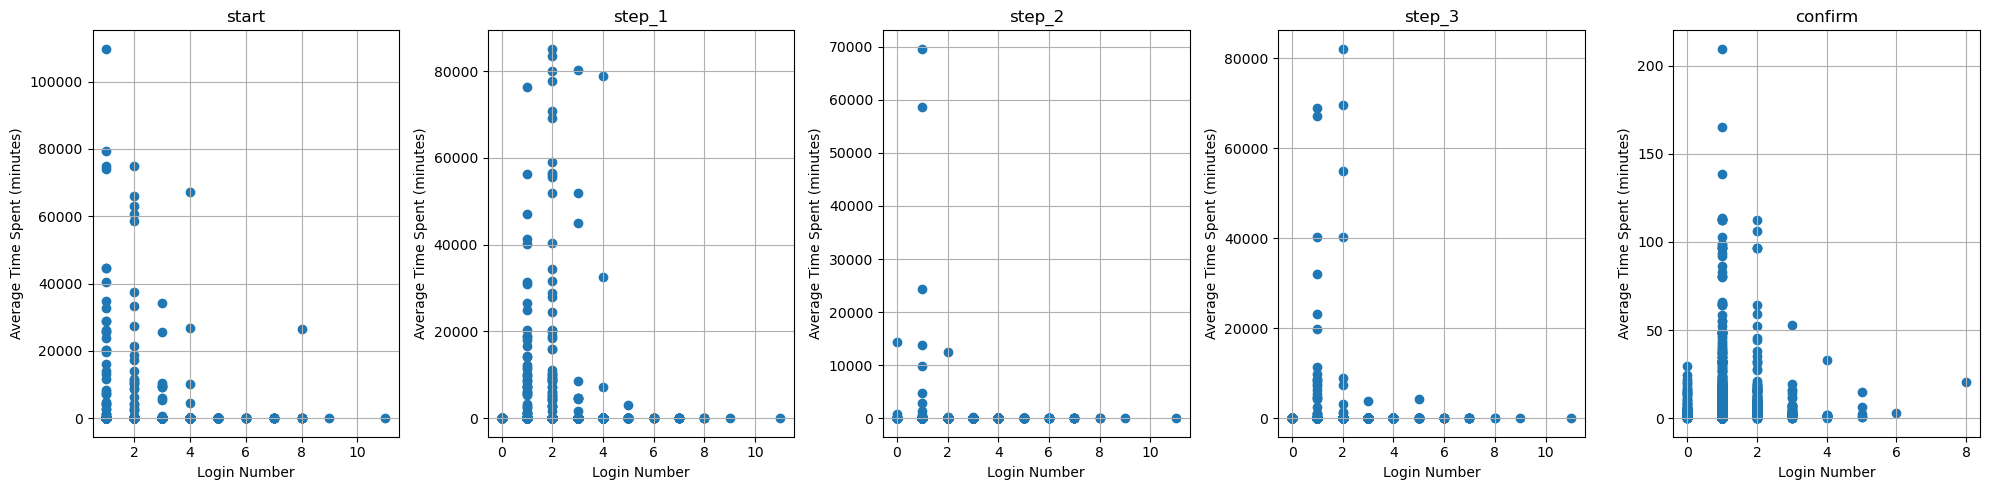

In [48]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'grouped_df' with columns: 'login_number', 'process_step', and 'time_spent_on_step'

# Step 1: Calculate the average time spent on each step per client login
avg_time_per_step = grouped_df_tg.groupby(['client_id', 'login_number_updated', 'process_step'])['time_spent_on_step(min)'].mean().reset_index()

# Step 2: Create a separate scatter plot for each step
steps = ['start', 'step_1', 'step_2', 'step_3', 'confirm']

# Create subplots for each step
fig, axes = plt.subplots(nrows=1, ncols=len(steps), figsize=(20, 5))

for i, step in enumerate(steps):
    step_data = avg_time_per_step[avg_time_per_step['process_step'] == step]
    ax = axes[i]
    ax.scatter(step_data['login_number_updated'], step_data['time_spent_on_step(min)'])
    ax.set_title(step)
    ax.set_xlabel('Login Number')
    ax.set_ylabel('Average Time Spent (minutes)')
    ax.grid(True)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

In [49]:
# Group the DataFrame by 'process_step' and calculate the total time spent on each step
total_time_per_step = grouped_df_tg.groupby('process_step')['time_spent_on_step(min)'].sum()

# Calculate the number of occurrences of each step
num_occurrences_per_step = grouped_df_tg.groupby('process_step').size()

# Calculate the average time spent on each step
average_time_per_step_tg = total_time_per_step / num_occurrences_per_step

# Group the DataFrame by 'process_step' and calculate the total time spent on each step
total_time_per_step = grouped_df_cg.groupby('process_step')['time_spent_on_step(min)'].sum()

# Calculate the number of occurrences of each step
num_occurrences_per_step = grouped_df_cg.groupby('process_step').size()

# Calculate the average time spent on each step
average_time_per_step_cg = total_time_per_step / num_occurrences_per_step

# Display the result
print('Avereage time spent per step control group: ',average_time_per_step_cg)
# Display the result
print('Avereage time spent per step test group: ',average_time_per_step_tg)

Avereage time spent per step control group:  process_step
confirm      4.179172
start      112.281510
step_1     257.681266
step_2      11.207698
step_3      49.201258
dtype: float64
Avereage time spent per step test group:  process_step
confirm     5.752859
start      58.952841
step_1     86.531337
step_2     10.999406
step_3     32.195605
dtype: float64


### Client Demographics Analysis
____________________________________

In [50]:
# Client profile with variation (test/control)

client_prof_variation = pd.merge(client_prof,experiment_roster,on='client_id')
for column in client_prof_variation.columns:
    print(f"Value counts for column '{column}':")
    print(client_prof_variation[column].value_counts(dropna=False))
    print()

Value counts for column 'client_id':
client_id
836976     1
2249663    1
2405235    1
68116      1
2709822    1
          ..
7081601    1
1941269    1
245270     1
7795711    1
5602139    1
Name: count, Length: 70609, dtype: int64

Value counts for column 'clnt_tenure_yr':
clnt_tenure_yr
6.0     7092
5.0     6955
7.0     4955
4.0     4687
15.0    4564
8.0     4045
14.0    3646
12.0    3631
13.0    3607
9.0     3357
11.0    2920
10.0    2775
16.0    2714
21.0    2257
20.0    1580
22.0    1492
17.0    1373
23.0    1279
18.0    1206
19.0    1153
24.0     846
26.0     660
27.0     632
28.0     507
25.0     484
3.0      449
29.0     309
30.0     303
33.0     206
32.0     191
34.0     175
31.0     166
35.0     102
2.0       81
36.0      36
37.0      35
38.0      33
48.0      16
NaN       14
39.0       9
40.0       9
55.0       9
50.0       8
42.0       6
47.0       6
43.0       6
46.0       5
51.0       5
49.0       4
44.0       3
52.0       2
54.0       1
41.0       1
45.0       1
62.0     

In [51]:
#Client profile with variation == TEST

test_group_prof = client_prof_variation[client_prof_variation['Variation'] == 'Test']
for column in test_group_prof.columns:
    print(f"Value counts for column '{column}':")
    print(test_group_prof[column].value_counts(dropna=False))
    print()

Value counts for column 'client_id':
client_id
836976     1
9516710    1
4740873    1
207455     1
5112102    1
          ..
9749636    1
9513978    1
7677503    1
2881693    1
7468138    1
Name: count, Length: 26968, dtype: int64

Value counts for column 'clnt_tenure_yr':
clnt_tenure_yr
5.0     2710
6.0     2644
7.0     1917
4.0     1825
15.0    1766
8.0     1614
14.0    1415
13.0    1391
12.0    1336
9.0     1271
10.0    1121
11.0    1061
16.0    1025
21.0     841
20.0     574
22.0     574
17.0     531
23.0     479
18.0     444
19.0     424
24.0     301
26.0     262
27.0     256
25.0     180
28.0     178
3.0      176
29.0     119
30.0     116
33.0      86
32.0      68
34.0      60
31.0      53
35.0      34
2.0       32
36.0      17
37.0      14
48.0       8
NaN        7
38.0       6
40.0       6
39.0       5
47.0       4
43.0       3
55.0       3
51.0       3
49.0       2
50.0       2
46.0       2
42.0       1
44.0       1
Name: count, dtype: int64

Value counts for column 'clnt_tenu

In [52]:
# Client profile with variation == CONTROL

control_group_prof = client_prof_variation[client_prof_variation['Variation'] == 'Control']
display(control_group_prof)

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control
5,3727881,5.0,71.0,30.5,U,2.0,23915.60,0.0,3.0,Control
6,272934,5.0,66.0,58.5,U,2.0,27021.42,2.0,5.0,Control
8,285619,30.0,369.0,67.5,M,2.0,299388.72,3.0,6.0,Control
...,...,...,...,...,...,...,...,...,...,...
50486,6662941,7.0,84.0,36.0,F,2.0,83101.84,4.0,7.0,Control
50491,2787512,23.0,283.0,48.0,F,3.0,123618.60,1.0,4.0,Control
50493,9932367,23.0,280.0,57.0,F,2.0,94466.55,6.0,9.0,Control
50494,4079649,23.0,276.0,62.5,M,3.0,57575.28,4.0,7.0,Control


In [53]:
# Client profile with variation == Null

na_group_prof = client_prof_variation[client_prof_variation['Variation'].isnull()]
display(na_group_prof)

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
50500,414870,6.0,80.0,57.0,U,2.0,492304.33,5.0,5.0,NaN
50501,1047811,9.0,118.0,30.0,M,2.0,27085.88,5.0,5.0,NaN
50502,6090170,5.0,62.0,28.0,U,2.0,39855.30,4.0,4.0,NaN
50503,706631,16.0,193.0,56.0,U,2.0,52298.64,5.0,5.0,NaN
50504,6844077,16.0,196.0,48.5,F,2.0,518763.48,7.0,7.0,NaN
...,...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0,NaN
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0,NaN
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0,NaN
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0,NaN


In [54]:
#Categorizing clients by age group

#Age group
#Young Adults: 0-30 years
#Middle-Aged Adults: 31-59 years
#Senior Adults: 60+ years

# Define a function to categorize age groups
def categorize_age(age):
    if age >= 0 and age <= 30:
        return 'Young Adults'
    elif age >= 31 and age <= 59:
        return 'Middle-Aged Adults'
    else:
        return 'Senior Adults'

# Apply the categorize_age function to create a new column 'Age Group'
client_prof_variation['age_groups']= client_prof_variation['clnt_age'].apply(categorize_age)


In [55]:
#Categorizing clients by longevity group

# 0-10 Average Longevity Group
# 11-20 Above-Average Longevity Group
# 21+ Exceptional Longevity Group


def categorize_longevity(tenure_yr):

    if tenure_yr >= 0 and tenure_yr <= 10:
        return 'Average Longevity Clients'
    elif tenure_yr >= 11 and tenure_yr <= 20:
        return 'Above-Average Longevity Clients'
    else:
        return 'Exceptional Longevity Clients'
    
###NOT SURE WHAT THIS IS
# Apply the categorize_longevity function to create a new column 'longevity_groups'
client_prof_variation['longevity_groups']= client_prof_variation['clnt_tenure_yr'].apply(categorize_longevity)


In [56]:
#Grouping clients by total balance group

#Low Balance:0 - 50,000
#Moderate Balance: 50,001- 500,000
#High Balance: 500,001- 1,000,000
#Very High Balance: 1,000,001+


def categorize_bal(bal):
    if bal >= 0 and bal <= 50000:
        return 'Low Balance'
    elif bal >= 50001 and bal <=  500000:
        return 'Moderate Balance'
    elif bal >=  500001 and bal <= 1000000:
        return 'High Balance'
    else:
        return 'Very High Balance'
    
###NOT SURE WHAT THIS IS
# Apply the categorize_bal function to create a new column 'bal_groups'
client_prof_variation['bal_groups']= client_prof_variation['bal'].apply(categorize_bal)

### Bounce Rate Analysis
_________________________________

In [57]:
#Total visits for test & control groups & bounce rate for test & control groups

all_visit_steps=pd.read_csv('all_visit_steps_final.csv')

test_group_step = all_visit_steps[all_visit_steps['variation'] == 'Test']
control_group_step = all_visit_steps[all_visit_steps['variation'] == 'Control']

total_num_visit_test_group = test_group_step['visit_id'].nunique()
print('Total number of visits for test group :',total_num_visit_test_group) 
total_num_visit_control_group = control_group_step['visit_id'].nunique()
print('Total number of visits for test group :',total_num_visit_control_group) 

only_start_test=test_group_step[test_group_step['step_hierarchy']==1]
num_bounce_test=len(only_start_test)
# print('Number of bounce for test group:',num_bounce_test)
bounce_rate_test = (num_bounce_test / total_num_visit_test_group) * 100
print("Bounce rate of test group:", round(bounce_rate_test,2), "%")

only_start_control=control_group_step[control_group_step['step_hierarchy']==1]
num_bounce_control=len(only_start_control)
# print('Number of bounce for control group:',num_bounce_control)
bounce_rate_control = (num_bounce_control / total_num_visit_control_group) * 100
print("Bounce rate of control group:", round(bounce_rate_control,2), "%")

Total number of visits for test group : 37136
Total number of visits for test group : 32189
Bounce rate of test group: 7.48 %
Bounce rate of control group: 11.26 %


In [58]:
only_start=all_visit_steps[all_visit_steps['step_hierarchy']==1].groupby('client_id').size()

only_start

client_id
934        1
1104       2
1368       1
2439       1
2581       1
          ..
9993886    1
9994194    1
9994633    1
9996877    1
9998921    1
Length: 5739, dtype: int64

### Error Rate Analysis
_________________________________

In [59]:
# TEST group total errors


# Function to count backward movements
def count_backward_movements(group):
    error_count = 0
    previous_step = None
    
    for index, row in group.iterrows():
        current_step_hierarchy = row['step_hierarchy']
        
        if previous_step is not None and current_step_hierarchy < previous_step:
            error_count += 1
        
        elif previous_step is not None and current_step_hierarchy > previous_step + 1:
            error_count += 1
        
        previous_step = current_step_hierarchy
    
    return error_count

# Group by client_id and apply the function to count backward movements
sorted_df_test_group = test_group.sort_values(by=['client_id', 'date_ymd', 'time_only'])
backward_movements_counts_test_group = sorted_df_test_group.groupby('client_id').apply(count_backward_movements)

# Calculate the total backward movements per client across all visits
total_backward_movements_per_client_test_group = backward_movements_counts_test_group.groupby('client_id').sum()

# Display the DataFrame
display(total_backward_movements_per_client_test_group)



client_id
555        0
647        0
934        0
1336       0
1346       3
          ..
9999150    1
9999400    0
9999626    0
9999729    2
9999832    0
Length: 26968, dtype: int64

In [60]:
# CONTROL Group total errors

# Function to count backward movements
def count_backward_movements(group):
    error_count = 0
    previous_step = None
    
    for index, row in group.iterrows():
        current_step_hierarchy = row['step_hierarchy']
        
        if previous_step is not None and current_step_hierarchy < previous_step:
            error_count += 1

        elif previous_step is not None and current_step_hierarchy > previous_step + 1:
            error_count += 1
        
        previous_step = current_step_hierarchy
    
    return error_count

# Group by client_id and apply the function to count backward movements
sorted_df_control_group = control_group.sort_values(by=['client_id', 'date_ymd', 'time_only'])
backward_movements_control_group = sorted_df_control_group.groupby('client_id').apply(count_backward_movements)

# Calculate the total backward movements per client across all visits
total_backward_movements_per_client_control_group = backward_movements_control_group.groupby('client_id').sum()

# Display the DataFrame
display(total_backward_movements_per_client_control_group)

client_id
1028       2
1104       0
1186       0
1195       0
1197       1
          ..
9997125    0
9997391    2
9997470    3
9998346    2
9998921    0
Length: 23532, dtype: int64

In [61]:
import pandas as pd

# Drop duplicate client IDs, keeping only the first occurrence
unique_client_prof = client_prof.drop_duplicates(subset=['client_id'])

# Create Error Rate df with client id and total errors per client
control_group_df = total_backward_movements_per_client_control_group.to_frame(name='control_group')
test_group_df = total_backward_movements_per_client_test_group.to_frame(name='test_group')

# Ensure that all client IDs from unique_client_prof are included by reindexing
control_group_df = control_group_df.reindex(unique_client_prof['client_id'], fill_value=0)
test_group_df = test_group_df.reindex(unique_client_prof['client_id'], fill_value=0)

# Concatenate the DataFrames along the columns axis
error_rates = pd.concat([control_group_df, test_group_df], axis=1)

# Drop the test_group column
error_rates.drop(columns=['test_group'], inplace=True)

# Rename the control_group column to number_errors
error_rates.rename(columns={'control_group': 'number_errors'}, inplace=True)

# Display the resulting DataFrame
print(error_rates)
print(error_rates.value_counts())

           number_errors
client_id               
836976                 0
2304905                0
1439522                0
1562045                0
5126305                0
...                  ...
7993686                0
8981690                0
333913                 0
1573142                0
5602139                0

[70609 rows x 1 columns]
number_errors
0                62444
1                 5062
2                 1792
3                  696
4                  279
5                  178
6                   84
7                   35
8                   19
10                   8
9                    6
12                   3
11                   2
17                   1
Name: count, dtype: int64


### Summary Table

** code to export csv of time spent per step
_________________________________

In [62]:
#initialize the summary table

# Extract the client_id and Variation columns from test_group
test_summary = test_group[['client_id', 'Variation']].copy()

# Rename the Variation column to study_group
test_summary.rename(columns={'Variation': 'study_group'}, inplace=True)

# Same for control group
control_summary = control_group[['client_id', 'Variation']].copy()
control_summary.rename(columns={'Variation': 'study_group'}, inplace=True)

# Concatenate the test_summary and control_summary DataFrames
summary_table = pd.concat([test_summary, control_summary], ignore_index=True)

# Drop duplicate client IDs
summary_table.drop_duplicates(subset=['client_id'], inplace=True)

In [63]:
#Add highest step reached column

# Merge highest_step_reached_control with the summary_table 
summary_table = summary_table.merge(highest_step_reached_control, on='client_id', how='left')
# Rename the column to differentiate it
summary_table.rename(columns={'step_hierarchy': 'highest_step_reached_control'}, inplace=True)

# Merge highest_step_reached_test with the summary_table
summary_table = summary_table.merge(highest_step_reached_test, on='client_id', how='left')
# Rename the column to differentiate it
summary_table.rename(columns={'step_hierarchy': 'highest_step_reached_test'}, inplace=True)

# Combine the two columns into a single column named highest_step_reached
summary_table['highest_step_reached'] = summary_table['highest_step_reached_control'].fillna(summary_table['highest_step_reached_test'])

# Drop the intermediate columns
summary_table.drop(columns=['highest_step_reached_control', 'highest_step_reached_test'], inplace=True)


In [64]:
display(summary_table)

,client_id,study_group,highest_step_reached
0,4192640,Test,step_2
1,6752370,Test,step_2
2,2685910,Test,confirm
3,3910683,Test,start
4,2376452,Test,confirm
...,...,...,...
50495,8447700,Control,confirm
50496,2079465,Control,confirm
50497,2061471,Control,confirm
50498,1558312,Control,confirm


In [65]:
#Add step hierarchy to summary table

step_hierarchy = {
    'start': 1,
    'step_1': 2,
    'step_2': 3,
    'step_3': 4,
    'confirm': 5
}

# Map the step hierarchy to the 'process_step' column
summary_table.loc[:, 'step_hierarchy'] = summary_table['highest_step_reached'].map(step_hierarchy)

# Find the highest step reached for each individual client
highest_step_reached = summary_table.groupby('client_id')['step_hierarchy'].max()

# Map the hierarchy back to step names
highest_step_reached = highest_step_reached.map({v: k for k, v in step_hierarchy.items()})

In [66]:
display(summary_table)

,client_id,study_group,highest_step_reached,step_hierarchy
0,4192640,Test,step_2,3
1,6752370,Test,step_2,3
2,2685910,Test,confirm,5
3,3910683,Test,start,1
4,2376452,Test,confirm,5
...,...,...,...,...
50495,8447700,Control,confirm,5
50496,2079465,Control,confirm,5
50497,2061471,Control,confirm,5
50498,1558312,Control,confirm,5


In [67]:
# Add completed process (Y/N)

completed_process = {
    1 : "No",
    2 : "No",
    3 : "No",
    4 : "No",
    5 : "Yes"
}

# Map completed_process to step_hierarchy column
summary_table.loc[:, 'completed_process'] = summary_table['step_hierarchy'].map(completed_process)


In [68]:
# Add total errors per client

# Reset index of error_rates DataFrame
error_rates.reset_index(inplace=True)

# Merge with summary_table
summary_table = summary_table.merge(error_rates[['client_id', 'number_errors']], on='client_id', how='left')

summary_table


,client_id,study_group,highest_step_reached,step_hierarchy,completed_process,number_errors
0,4192640,Test,step_2,3,No,0
1,6752370,Test,step_2,3,No,0
2,2685910,Test,confirm,5,Yes,0
3,3910683,Test,start,1,No,0
4,2376452,Test,confirm,5,Yes,0
...,...,...,...,...,...,...
50495,8447700,Control,confirm,5,Yes,0
50496,2079465,Control,confirm,5,Yes,1
50497,2061471,Control,confirm,5,Yes,0
50498,1558312,Control,confirm,5,Yes,1


In [69]:
# Add encountered errors (Yes/No)

summary_table["encountered_errors"] = summary_table["number_errors"].apply(lambda x: "Yes" if x > 0 else "No")


In [70]:
# Add number of calls
summary_table = summary_table.merge(client_prof[['client_id', 'calls_6_mnth']], on='client_id', how='left')

In [71]:
# Add sex

summary_table = summary_table.merge(client_prof[['client_id', 'gendr']], on='client_id', how='left')

In [72]:
# Add number of logins

summary_table = summary_table.merge(client_prof[['client_id', 'logons_6_mnth']], on='client_id', how='left')

In [73]:
# Add Age

summary_table = summary_table.merge(client_prof[['client_id', 'clnt_age']], on='client_id', how='left')

In [74]:
# Add balance

summary_table = summary_table.merge(client_prof[['client_id', 'bal']], on='client_id', how='left')

In [75]:
# Add Longevity in Years

summary_table = summary_table.merge(client_prof[['client_id', 'clnt_tenure_yr']], on='client_id', how='left')

In [76]:
### Add longevity category
summary_table = summary_table.merge(client_prof_variation[['client_id', 'longevity_groups']], on='client_id', how='left')

In [77]:
### Add age category
summary_table = summary_table.merge(client_prof_variation[['client_id', 'age_groups']], on='client_id', how='left')

In [78]:
### Add balance category
summary_table = summary_table.merge(client_prof_variation[['client_id', 'bal_groups']], on='client_id', how='left')

In [79]:
# Add bounce rate

In [80]:
display(summary_table)

,client_id,study_group,highest_step_reached,step_hierarchy,completed_process,number_errors,encountered_errors,calls_6_mnth,gendr,logons_6_mnth,clnt_age,bal,clnt_tenure_yr,longevity_groups,age_groups,bal_groups
0,4192640,Test,step_2,3,No,0,No,3.0,M,6.0,54.0,97914.40,14.0,Above-Average Longevity Clients,Middle-Aged Adults,Moderate Balance
1,6752370,Test,step_2,3,No,0,No,2.0,M,5.0,22.0,56574.43,38.0,Exceptional Longevity Clients,Young Adults,Moderate Balance
2,2685910,Test,confirm,5,Yes,0,No,6.0,F,9.0,57.5,135363.65,12.0,Above-Average Longevity Clients,Middle-Aged Adults,Moderate Balance
3,3910683,Test,start,1,No,0,No,6.0,U,9.0,24.0,65233.30,5.0,Average Longevity Clients,Young Adults,Moderate Balance
4,2376452,Test,confirm,5,Yes,0,No,6.0,F,9.0,54.5,1073878.77,20.0,Above-Average Longevity Clients,Middle-Aged Adults,Very High Balance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50495,8447700,Control,confirm,5,Yes,0,No,2.0,M,5.0,50.0,36227.90,7.0,Average Longevity Clients,Middle-Aged Adults,Low Balance
50496,2079465,Control,confirm,5,Yes,1,Yes,1.0,U,4.0,18.0,25022.78,4.0,Average Longevity Clients,Young Adults,Low Balance
50497,2061471,Control,confirm,5,Yes,0,No,1.0,F,4.0,51.0,36109.86,15.0,Above-Average Longevity Clients,Middle-Aged Adults,Low Balance
50498,1558312,Control,confirm,5,Yes,1,Yes,2.0,F,5.0,64.0,27918.86,23.0,Exceptional Longevity Clients,Senior Adults,Low Balance


In [81]:
# Count the number of bounces for each client
only_start = all_visit_steps[all_visit_steps['step_hierarchy'] == 1].groupby('client_id').size().reset_index(name='number_of_bounce')

# Merge the number_of_bounce_df with the summary_table DataFrame
summary_table = summary_table.merge(only_start, on='client_id', how='left')

# Fill NaN values with 0 after merge
summary_table['number_of_bounce'] = summary_table['number_of_bounce'].fillna(0)

# Display the updated summary_table DataFrame
display(summary_table)

,client_id,study_group,highest_step_reached,step_hierarchy,completed_process,number_errors,encountered_errors,calls_6_mnth,gendr,logons_6_mnth,clnt_age,bal,clnt_tenure_yr,longevity_groups,age_groups,bal_groups,number_of_bounce
0,4192640,Test,step_2,3,No,0,No,3.0,M,6.0,54.0,97914.40,14.0,Above-Average Longevity Clients,Middle-Aged Adults,Moderate Balance,0.0
1,6752370,Test,step_2,3,No,0,No,2.0,M,5.0,22.0,56574.43,38.0,Exceptional Longevity Clients,Young Adults,Moderate Balance,0.0
2,2685910,Test,confirm,5,Yes,0,No,6.0,F,9.0,57.5,135363.65,12.0,Above-Average Longevity Clients,Middle-Aged Adults,Moderate Balance,0.0
3,3910683,Test,start,1,No,0,No,6.0,U,9.0,24.0,65233.30,5.0,Average Longevity Clients,Young Adults,Moderate Balance,2.0
4,2376452,Test,confirm,5,Yes,0,No,6.0,F,9.0,54.5,1073878.77,20.0,Above-Average Longevity Clients,Middle-Aged Adults,Very High Balance,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50495,8447700,Control,confirm,5,Yes,0,No,2.0,M,5.0,50.0,36227.90,7.0,Average Longevity Clients,Middle-Aged Adults,Low Balance,0.0
50496,2079465,Control,confirm,5,Yes,1,Yes,1.0,U,4.0,18.0,25022.78,4.0,Average Longevity Clients,Young Adults,Low Balance,0.0
50497,2061471,Control,confirm,5,Yes,0,No,1.0,F,4.0,51.0,36109.86,15.0,Above-Average Longevity Clients,Middle-Aged Adults,Low Balance,0.0
50498,1558312,Control,confirm,5,Yes,1,Yes,2.0,F,5.0,64.0,27918.86,23.0,Exceptional Longevity Clients,Senior Adults,Low Balance,0.0


In [89]:
summary_table['number_errors'].value_counts()

number_errors
0     42335
1      5062
2      1792
3       696
4       279
5       178
6        84
7        35
8        19
10        8
9         6
12        3
11        2
17        1
Name: count, dtype: int64

In [83]:
# Get the current working directory
current_directory = os.getcwd()

# Specify the file name
file_name = "summary_table.csv"

# Join the current directory with the file name to create the file path
file_path = os.path.join(current_directory, file_name)

# Export the summary_table DataFrame to a CSV file
summary_table.to_csv(file_path, index=False)

print(f"Summary table has been exported to {file_path}")

Summary table has been exported to c:\Users\darce\Ironhack\week4\Vanguard_Investment_AB_Testing\summary_table.csv


# Hypothesis Testing
_____________________________________________________________________________________________________________________________________

## First Test - Completion Rate
**Is the completion rate for the control and test groups the same?**

In [84]:
#checking if step hierarchy data is normally distributed using Kolmogorov-Smirnov test 


# First, we need to standardize the data to have mean 0 and variance 1 since we're comparing against a standard normal distribution
standardized_step_hierarchy = (control_group['step_hierarchy'] - control_group['step_hierarchy'].mean()) / control_group['step_hierarchy'].std()
ks_test_statistic, ks_p_value = st.kstest(standardized_step_hierarchy, 'norm')

ks_test_statistic, ks_p_value
# print the test result
if ks_p_value < 0.05:
    print('The test results indicate that the distribution of prices is significantly different from a normal distribution.')
else:
    print('The test results indicate that the distribution of prices is not significantly different from a normal distribution.')

The test results indicate that the distribution of prices is significantly different from a normal distribution.


In [ ]:
#Set the hypothesis

#H0: step_hierarchy control_group = step_hierarchy test_group
#H1: step_hierarchy control_group < step_hierarchy test_group

#significance level = 0.05

In [ ]:
# Using Mann-Whitney U test which is non-parametric and does not assume that test data is normally distributed.

In [85]:
from scipy.stats import mannwhitneyu

# Assuming control_group and test_group are your two groups of data
# control_group and test_group should be one-dimensional arrays or lists

df_control = summary_table[summary_table["study_group"]=="Control"]["step_hierarchy"]
df_test = summary_table[summary_table["study_group"]=="Test"]["step_hierarchy"]

# Perform the Mann-Whitney U test
statistic, p_value = mannwhitneyu(df_control, df_test)

# Print the results
print("Mann-Whitney U statistic:", statistic)
print("p-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a statistically significant difference between the two groups.")
else:
    print("Fail to reject the null hypothesis. There is no statistically significant difference between the two groups.")

Mann-Whitney U statistic: 302342574.5
p-value: 2.6990245028400833e-28
Reject the null hypothesis. There is a statistically significant difference between the two groups.


Interpreting the Mann-Whitney U statistic involves comparing it to the critical value or p-value obtained from the test.

If you are using the U statistic directly: The larger the U statistic, the greater the difference in ranks between the two groups. So, a larger U value indicates a greater tendency for one group to have higher ranks than the other.

If you are comparing it to a critical value or using it to calculate a p-value: You would compare the obtained U statistic to the critical value from the Mann-Whitney U distribution for a given significance level, or you would use it to calculate a p-value.

A lower U statistic (closer to 0) indicates a greater tendency for observations in the first group to have higher ranks.

A higher U statistic (closer to the maximum possible value, which is the product of the group sizes) indicates a greater tendency for observations in the second group to have higher ranks.

## Test 1 Conclusion

The results of the Mann-Whitney U test indicate a statistically significant difference between the two groups being compared.
- The very small p-value (2.6990245028400833e-28) suggests strong evidence **against** the null hypothesis.
- The very large U statistic (302342574.5) indicates that there is a greater tendency for the observations in the second group (the TEST group) to rank higher.

**We reject the null hypothesis, and decide to accept the alternative hypothesis that the conversion rate for the test group is higher.**
____________________________________________________________________________________________________________________________________


## Second Test - Error Rates
**Are the error rates for the control and test groups the same?**

In [91]:
df_control_errors = summary_table[summary_table["study_group"]=="Control"]["number_errors"]
df_test_errors = summary_table[summary_table["study_group"]=="Test"]["number_errors"]

In [ ]:
#Set the hypothesis

#H0: total_backwards_movements control_group = total_backwards_movements test_group
#H1: total_backwards_movements control_group < total_backwards_movements test_group

#significance level = 0.05

In [92]:
display(df_test_errors)

0        0
1        0
2        0
3        0
4        0
        ..
26963    0
26964    0
26965    0
26966    0
26967    0
Name: number_errors, Length: 26968, dtype: int64

In [93]:
statistic, p_value = mannwhitneyu(df_control_errors, df_test_errors)

# Print the results
print("Mann-Whitney U statistic:", statistic)
print("p-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a statistically significant difference between the two groups.")
else:
    print("Fail to reject the null hypothesis. There is no statistically significant difference between the two groups.")

Mann-Whitney U statistic: 427402348.0
p-value: 0.0
Reject the null hypothesis. There is a statistically significant difference between the two groups.


## Test 2 Conclusion

The results of the Mann-Whitney U test indicate a statistically significant difference between the two groups being compared.
- The very small p-value (2.6990245028400833e-28) suggests strong evidence **against** the null hypothesis.
- The very large U statistic (302342574.5) indicates that there is a greater tendency for the observations in the second group (the TEST group) to rank higher.

**We reject the null hypothesis, and decide to accept the alternative hypothesis that the conversion rate for the test group is higher.**
____________________________________________________________________________________________________________________________________


## Third Test - Bounce Rate
**Are the bounce rates for the control and test groups the same?**

In [ ]:
df_control_bounce = summary_table[summary_table["study_group"]=="Control"]["number_of_bounce"]
df_test_bounce = summary_table[summary_table["study_group"]=="Test"]["number_of_bounce"]

In [ ]:
statistic, p_value = mannwhitneyu(df_control_bounce, df_test_bounce)

# Print the results
print("Mann-Whitney U statistic:", statistic)
print("p-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a statistically significant difference between the two groups.")
else:
    print("Fail to reject the null hypothesis. There is no statistically significant difference between the two groups.")

## Test 3 Conclusion

The results of the Mann-Whitney U test indicate a statistically significant difference between the two groups being compared.
- The very small p-value (2.232973744312736e-65) suggests strong evidence **against** the null hypothesis.
- The very large U statistic (332655637.5) indicates that there is a greater tendency for the observations in the second group (the TEST group) to rank higher.

**We reject the null hypothesis, and decide to accept the alternative hypothesis that the conversion rate for the test group is higher.**
____________________________________________________________________________________________________________________________________

## Fourth Test - Time Spent Per Step
**Is the time spent per step for the control and test groups the same?**

In [94]:
#creating df for test group which sums the time spent per step per client

# Pivot the DataFrame to get time spent on each step as separate columns
test_group_time_spent_per_step_per_client = grouped_df_tg.pivot_table(index='client_id', columns='process_step', values='time_spent_on_step(min)', aggfunc='sum')

# Fill NaN values with 0
test_group_time_spent_per_step_per_client = test_group_time_spent_per_step_per_client.fillna(0)

# Reset index to make 'client_id' a column
test_group_time_spent_per_step_per_client.reset_index(inplace=True)

test_group_time_spent_per_step_per_client.drop(columns=['confirm'], inplace=True)

# Display the resulting DataFrame
print(test_group_time_spent_per_step_per_client)

process_step  client_id  start  step_1  step_2  step_3
0                   555  0.117   0.533   1.650   0.333
1                   647  0.117   0.300   3.150   2.717
2                   934  2.367   0.000   0.000   0.000
3                  1336  0.417   0.433   0.850   1.817
4                  1346  2.650   3.367   0.817   1.417
...                 ...    ...     ...     ...     ...
25444           9999150  0.100   0.200   0.000   0.000
25445           9999400  0.367   0.450   0.767   0.400
25446           9999626  0.133   0.000   0.000   0.000
25447           9999729  1.700   4.950   2.000   0.350
25448           9999832  0.133   0.000   0.000   0.000

[25449 rows x 5 columns]


In [95]:
#creating df for control group which sums the time spent per step per client

# Pivot the DataFrame to get time spent on each step as separate columns
control_group_time_spent_per_step_per_client = grouped_df_cg.pivot_table(index='client_id', columns='process_step', values='time_spent_on_step(min)', aggfunc='sum')

# Fill NaN values with 0
control_group_time_spent_per_step_per_client = control_group_time_spent_per_step_per_client.fillna(0)

# Reset index to make 'client_id' a column
control_group_time_spent_per_step_per_client.reset_index(inplace=True)

control_group_time_spent_per_step_per_client.drop(columns=['confirm'], inplace=True)

# Display the resulting DataFrame
print(control_group_time_spent_per_step_per_client)

process_step  client_id  start  step_1  step_2  step_3
0                  1028  0.817   1.567   4.733   1.850
1                  1186  0.183   0.183   0.000   0.000
2                  1195  0.550   1.633   0.517   1.383
3                  1197  0.067   0.100   0.950   0.467
4                  3647  0.233   1.767   7.567   3.833
...                 ...    ...     ...     ...     ...
21134           9997114  0.483   1.400   2.000   1.083
21135           9997125  0.167   0.467   0.917   1.417
21136           9997391  0.817   0.233   1.250   1.417
21137           9997470  2.817   4.383   2.017  34.550
21138           9998346  1.033   1.017   1.450   8.967

[21139 rows x 5 columns]


In [ ]:
control_group_aggregated = control_group_time_spent_per_step_per_client.groupby('client_id').agg({
    'start': 'sum',
    'step_1': 'sum',
    'step_2': 'sum',
    'step_3': 'sum'
}).reset_index()

# Display the resulting DataFrame
print(control_group_aggregated)

In [ ]:
control_group_aggregated = control_group_df.groupby('client_id').sum()
test_group_aggregated = test_group_df.groupby('client_id').sum()


# Perform Mann-Whitney U test on each step
for step in ['start', 'step_1', 'step_2', 'step_3']:
    statistic, p_value = mannwhitneyu(control_group_aggregated[step], test_group_aggregated[step])
    print(f"Mann-Whitney U statistic for {step}: {statistic}")
    print(f"P-value for {step}: {p_value}")
    if p_value < alpha:
        print(f"Reject the null hypothesis for {step}. There is a statistically significant difference between the two groups.")
    else:
        print(f"Fail to reject the null hypothesis for {step}. There is no statistically significant difference between the two groups.")

In [ ]:
control_group_aggregated

# Visualizations
_____________________________________________________________________________________________________________________________________

In [ ]:
# Define process steps as x-axis labels
process_steps = test_group_step_counts.index.tolist()

# Define percentages as y-axis values
test_group_percentages_values = test_group_percentages.tolist()
control_group_percentages_values = control_group_percentages.tolist()

# Define width of bars
bar_width = 0.35

# Define positions for bars
x_test_group = range(len(process_steps))
x_control_group = [x + bar_width for x in x_test_group]

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(x_test_group, test_group_percentages_values, width=bar_width, label='Test Group')
plt.bar(x_control_group, control_group_percentages_values, width=bar_width, label='Control Group')

# Add labels, title, and legend
plt.xlabel('Process Steps')
plt.ylabel('Percentage')
plt.title('Percentage of Process Steps Reached by Test and Control Groups')
plt.xticks([x + bar_width/2 for x in x_test_group], process_steps)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

In [ ]:
grouped_summary = summary_table.groupby('study_group')['total_backwards_movements'].mean()

# Define labels and values
labels = grouped_summary.index
values = grouped_summary.values

# Create bar plot
plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['green', 'red'])
plt.xlabel('Study Group')
plt.ylabel('Average Number of Errors Encountered')
plt.title('Mean Total Backward Movements by Study Group')
plt.show()